In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"user","key":"12345646"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wordsforthewise/lending-club

100% 1.26G/1.26G [00:10<00:00, 113MB/s]
100% 1.26G/1.26G [00:10<00:00, 125MB/s]


In [ ]:
!kaggle kernels pull faressayah/lending-club-loan-defaulters-prediction

'latin-1' codec can't encode character u'\U0001f3e6' in position 378: ordinal not in range(256)


In [ ]:
!ls

kaggle.json  lending-club.zip  sample_data


In [ ]:
!unzip lending-club-loan-defaulters-prediction.ipynb

Archive:  lending-club.zip
  inflating: accepted_2007_to_2018Q4.csv.gz  
  inflating: accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: rejected_2007_to_2018Q4.csv.gz  
  inflating: rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


In [ ]:
loan_df = pd.read_csv('/content/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')

In [ ]:
loan_df.shape[0]

2260701

In [ ]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

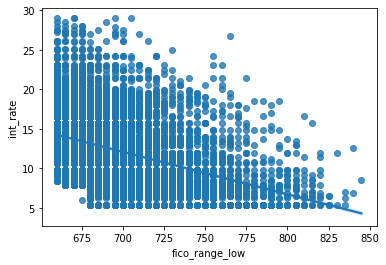

In [ ]:
sns.regplot(x='fico_range_low',y='int_rate',data=loan_df[:10000]) 

In [ ]:
loan_df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
loan_int_df=loan_df[loan_df['loan_status']!='Current']
loan_int_df=loan_int_df[loan_df['loan_status']!='Late (31-120 days)']
loan_int_df=loan_int_df[loan_df['loan_status']!='In Grace Period']
loan_int_df=loan_int_df[loan_df['loan_status']!='Late (16-30 days)']

In [ ]:
loan_int_df['loan_status'].value_counts()

Fully Paid     482595
Charged Off    129187
Default            21
Name: loan_status, dtype: int64

In [ ]:
loan_int_df.groupby('loan_status').agg({'last_fico_range_high':'mean'})

,last_fico_range_high
loan_status,
Charged Off,568.443236
Default,588.875000
Does not meet the credit policy. Status:Charged Off,613.237845
Does not meet the credit policy. Status:Fully Paid,677.829477
Fully Paid,704.433473


In [ ]:
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Charged Off','Default')
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Fully Paid','Good')

In [ ]:
loan_int_df['loan_status'].value_counts()

Good                                                   1076751
Default                                                 268599
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Name: loan_status, dtype: int64

In [ ]:
loan_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348132 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 1.5+ GB


In [ ]:
loan_int_df['fico_range_low'].min()

610.0

In [ ]:
loan_int_df['fico_range_low'].max()

845.0

In [ ]:
loan_int_df['last_fico_range_low'].min()

0.0

In [ ]:
loan_int_df['last_fico_range_low']=loan_int_df.apply(lambda x: x['fico_range_low'] if x['last_fico_range_low']==0.0 else x['last_fico_range_low'],axis=1)

In [ ]:
loan_int_df['last_fico_range_low'].min()

In [ ]:
loan_int_df['last_fico_range_low'].max()

In [ ]:
import math
loan_int_df['fico_score']=loan_int_df['last_fico_range_low'].apply(lambda x: int(math.ceil(x/10))*10)

In [ ]:
loan_int_df.head()

In [ ]:
loan_int_df.isnull().sum()

In [ ]:
loan_int_df[loan_df['dti'].isnull()]

In [ ]:
loan_int_df['dti_final']=loan_int_df.apply(lambda x: x['dti_joint'] if pd.isnull(x['dti']) else x['dti'], axis=1)
loan_int_df['annual_inc_final']=loan_int_df.apply(lambda x: x['annual_inc_joint'] if x['annual_inc']==0.0 else x['annual_inc'], axis=1)

In [ ]:
loan_int_df.isnull().sum()

In [ ]:
loan_int_df.head()

In [ ]:
loan_int_df['fico_score'].value_counts().sort_index()

500     3585
510     8223
520     9792
530    10984
540    12333
550    12817
560    12659
570    12380
580    11723
590    10902
600    10509
610    10775
620    11093
630    11947
640    13946
650    17249
660    25423
670    33494
680    37968
690    40444
700    40425
710    39677
720    37891
730    33519
740    27707
750    23225
760    19593
770    17280
780    15495
790    12844
800    10284
810     7646
820     4769
830     2384
840      694
850      124
Name: fico_score, dtype: int64

In [ ]:
fico_df=loan_int_df['fico_score'].value_counts().sort_index()

In [ ]:
fico_df.head()

500     3585
510     8223
520     9792
530    10984
540    12333
Name: fico_score, dtype: int64

In [ ]:
loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()

500     3183
510     7191
520     8370
530     9254
540    10127
550    10164
560     9703
570     9060
580     8004
590     6852
600     5881
610     5195
620     4468
630     3708
640     2898
650     2310
660     4091
670     5232
680     3918
690     2875
700     2027
710     1515
720     1024
730      613
740      447
750      298
760      230
770      167
780      136
790       92
800       72
810       52
820       28
830       14
840        6
850        3
Name: fico_score, dtype: int64

In [ ]:
loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean', 'loan_amnt':'mean','annual_inc':'median'})

,dti_final,loan_amnt,annual_inc
fico_score,,,
500,19.737013,13660.718271,55000.0
510,19.747810,13889.672261,56000.0
520,20.085761,14186.139195,58728.0
530,20.253199,14487.008376,60000.0
540,20.770446,14756.367064,60000.0
550,20.788260,14864.664118,60000.0
560,20.974137,15115.060431,61900.0
570,20.731022,15058.697496,62000.0
580,20.742532,15020.675168,62000.0


In [ ]:
loan_int_df[['fico_score','annual_inc','int_rate']].groupby('fico_score').mean()

,annual_inc,int_rate
fico_score,,
500,63396.102921,15.352285
510,65446.522628,15.440212
520,68261.387077,15.312451
530,69041.523403,15.449011
540,69948.952428,15.271022
550,70157.608170,15.048212
560,72611.186614,14.937358
570,72955.585910,14.830960
580,73070.848848,14.791581


In [ ]:
fico_df=pd.concat([fico_df,pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()),pd.DataFrame(loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean', 'loan_amnt':'mean','annual_inc':'median'})),pd.DataFrame(loan_int_df[['fico_score','annual_inc','int_rate']].groupby('fico_score').mean())], ignore_index=True, axis=1)

In [ ]:
fico_df.head()

,0,1,2,3,4,5,6
500,3585,3183,19.737013,13660.718271,55000.0,63396.102921,15.352285
510,8223,7191,19.747810,13889.672261,56000.0,65446.522628,15.440212
520,9792,8370,20.085761,14186.139195,58728.0,68261.387077,15.312451
530,10984,9254,20.253199,14487.008376,60000.0,69041.523403,15.449011
540,12333,10127,20.770446,14756.367064,60000.0,69948.952428,15.271022


In [ ]:
fico_df=fico_df.reset_index()

In [ ]:
fico_df.columns = ['fico_score','loan_total','default_total','dti','avg_loan_amnt','median_annual_inc','avg_annual_inc','int_rate']

In [ ]:
fico_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate
0,500,3585,3183,19.737013,13660.718271,55000.0,63396.102921,15.352285
1,510,8223,7191,19.747810,13889.672261,56000.0,65446.522628,15.440212
2,520,9792,8370,20.085761,14186.139195,58728.0,68261.387077,15.312451
3,530,10984,9254,20.253199,14487.008376,60000.0,69041.523403,15.449011
4,540,12333,10127,20.770446,14756.367064,60000.0,69948.952428,15.271022


In [ ]:
fico_df['default_rate']=(fico_df.default_total/fico_df.default_total.sum())*100
fico_df['actual_default_rate']=(fico_df.default_total/fico_df.loan_total.sum())*100

In [ ]:
fico_df.head(20)

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.718271,55000.0,63396.102921,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.672261,56000.0,65446.522628,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.139195,58728.0,68261.387077,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.008376,60000.0,69041.523403,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.367064,60000.0,69948.952428,15.271022,7.837750,1.655271
5,550,12817,10164,20.788260,14864.664118,60000.0,70157.608170,15.048212,7.866386,1.661319
6,560,12659,9703,20.974137,15115.060431,61900.0,72611.186614,14.937358,7.509597,1.585968
7,570,12380,9060,20.731022,15058.697496,62000.0,72955.585910,14.830960,7.011950,1.480869
8,580,11723,8004,20.742532,15020.675168,62000.0,73070.848848,14.791581,6.194663,1.308264
9,590,10902,6852,20.737378,14849.385434,62000.0,72049.620998,14.712871,5.303077,1.119968


In [ ]:
fico_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,675.000000,16994.527778,3589.111111,18.790417,15088.569697,65678.583333,77391.960108,12.520384,2.777778,0.586645
std,105.356538,11917.752515,3512.765608,1.690671,1633.584598,6846.614297,8038.473537,2.560128,2.718690,0.574166
min,500.000000,124.000000,3.000000,14.676210,12994.231601,55000.000000,63396.102921,7.585562,0.002322,0.000490
25%,587.500000,10452.750000,214.250000,17.650570,14038.181178,61297.500000,72364.301711,10.453639,0.165818,0.035019
50%,675.000000,12519.500000,2886.500000,19.083851,14857.024776,63000.000000,74919.065437,13.556549,2.233995,0.471802
75%,762.500000,23774.500000,6123.750000,20.165171,15353.673885,68250.000000,80706.824486,14.732548,4.739451,1.000935
max,850.000000,40444.000000,10164.000000,20.974137,20082.459677,83750.000000,98683.805747,15.449011,7.866386,1.661319


In [ ]:
fico_df.to_csv('loan_analysis_summary.csv')

In [ ]:
fico_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.067153,-0.886782,-0.923870,0.685468,0.906772,0.927058,-0.969029,-0.886782,-0.886782
loan_total,0.067153,1.000000,-0.146124,0.141039,-0.475837,-0.151144,-0.094418,0.113229,-0.146124,-0.146124
default_total,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
dti,-0.923870,0.141039,0.845046,1.000000,-0.783764,-0.899118,-0.897630,0.962789,0.845046,0.845046
avg_loan_amnt,0.685468,-0.475837,-0.443113,-0.783764,1.000000,0.855159,0.832335,-0.803379,-0.443113,-0.443113
median_annual_inc,0.906772,-0.151144,-0.717776,-0.899118,0.855159,1.000000,0.991677,-0.945029,-0.717776,-0.717776
avg_annual_inc,0.927058,-0.094418,-0.741849,-0.897630,0.832335,0.991677,1.000000,-0.946145,-0.741849,-0.741849
int_rate,-0.969029,0.113229,0.850278,0.962789,-0.803379,-0.945029,-0.946145,1.000000,0.850278,0.850278
default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
actual_default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
